In [271]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import glob,os

# font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
# prop = mfm.FontProperties(fname=font_path)

In [9]:
data_dir ='./results/'

In [109]:
import matplotlib as mpl
font_name = "PingFang HK"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box


## loading data

In [27]:
# labels
L = np.load(data_dir + "/L.npy")
# data from torch
tor_data = np.load(data_dir+ "/tor_data.npy")
# data after tsne
X_embedded = np.load(data_dir + "/X_embedded.npy")
#square difference from the center
SE = np.load(data_dir+ "/SE.npy")
class_by_eye = np.load('./results/class_by_eye.npy',allow_pickle=True)
subgroup_hier= np.load(data_dir+ "/subgroup_hier.npy", allow_pickle=True)

### load k-mean results

In [11]:
U = np.load(data_dir+"k_mean_15classes.npy",allow_pickle=True)
cl = U.item().get("cl")
c =  U.item().get("c")
k =  U.item().get("k")

In [12]:
### print out k-mean results

In [13]:
text = ''
array_text = []
for i in range(k):
#     print("group%d:"%i, np.array(L)[np.where(cl.numpy()==i)])
#     print(str(np.array(L)[np.where(cl.numpy()==i)]))
    text += "group%d:"%i + str(np.array(L)[np.where(cl.numpy()==i)]) +'\r\n'
    array_text.append(np.array(L)[np.where(cl.numpy()==i)])



In [40]:
x = np.random.rand(15)
y = np.random.rand(15)

In [41]:
','.join(class_by_eye[i])

'simple characters'

In [57]:
np.mean(c[0].cpu().numpy())

0.09587868

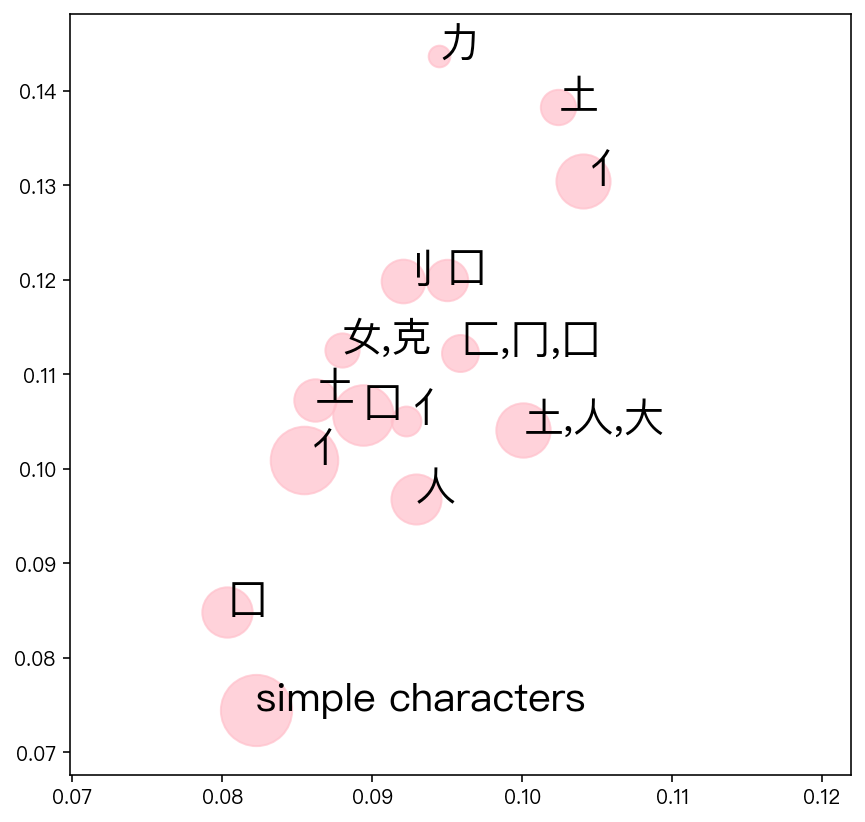

In [108]:
import matplotlib.cm as cm
plt.figure(figsize = (7,7))
for i in range(15):
    size = int(len(np.where(cl==i)[0]))
    x = np.mean(c[i].cpu().numpy())
    y = np.std(c[i].cpu().numpy())
    plt.scatter(x, y, s = size**1.3, alpha = 0.7, c = 'pink')
    plt.text(x, y, ','.join(class_by_eye[i]), fontsize = 20)
    

In [115]:
print(max(X_embedded[:,0])-min(X_embedded[:,0]))
print(max(X_embedded[:,1])-min(X_embedded[:,1]))

105.23219
84.08007


In [162]:
def dis(x, x0, y, y0):
    return np.sqrt((x-x0)**2 + (y-y0)**2)

In [215]:
import networkx as nx
f = nx.Graph()
nn = 400
f.add_nodes_from(L[:nn])

In [221]:
for i,li in enumerate(L[:nn]):
#     print(i)
    for j,lj in enumerate(L[:nn]):
        distance = dis(X_embedded[i,0], X_embedded[j,0], X_embedded[i,1], X_embedded[j,1])
        if distance<10:
            f.add_edge(li, lj, weight= 1/(distance+0.1))

In [222]:
print('pairs:', len(f.edges()))
print('nodes:', len(f.nodes()))

pairs: 4250
nodes: 400


In [223]:
f.nodes()

NodeView(('囧', '嚕', '吼', '圹', '何', '兵', '咶', '呃', '喌', '向', '叡', '唤', '匭', '塙', '冻', '嘒', '傖', '名', '儗', '倖', '嘧', '倞', '夾', '专', '夬', '姑', '呲', '呆', '匯', '妻', '刪', '声', '启', '伤', '倆', '丘', '卲', '匴', '佝', '伫', '夆', '似', '唁', '噼', '叱', '劃', '其', '古', '倎', '圄', '嗒', '夒', '啬', '们', '姥', '姴', '坡', '偬', '垡', '坞', '兀', '動', '劌', '儃', '侯', '劂', '乖', '凇', '劦', '刃', '什', '埙', '哳', '吧', '塕', '埧', '冂', '垢', '俸', '便', '剉', '凈', '信', '咇', '举', '僛', '墜', '佤', '仓', '嗦', '咭', '仑', '嚭', '咸', '净', '京', '善', '埕', '委', '場', '僾', '儔', '丞', '匾', '另', '奈', '唪', '墐', '塱', '吽', '埣', '仨', '叟', '呴', '則', '刹', '圁', '佔', '伾', '倮', '墊', '喫', '唈', '份', '嘎', '佺', '埯', '僧', '卩', '哱', '埌', '咪', '壽', '台', '嚥', '囮', '壔', '埜', '夺', '保', '囁', '俏', '俋', '奧', '哺', '哠', '奭', '仈', '妁', '嗉', '临', '嘸', '制', '唢', '堽', '图', '啐', '哙', '僨', '叮', '倬', '啅', '固', '头', '喉', '夢', '劗', '刁', '埒', '壈', '吞', '准', '嘴', '嚝', '俳', '咯', '妹', '啼', '冘', '刀', '剸', '嗾', '亲', '妈', '呇', '勀', '冠', '囪', '卬', '倩', '壇', '嗓', '勵', '俦', '妆', '僑', '哿', '亙', 

In [261]:
pos = nx.spring_layout(f, iterations=200)

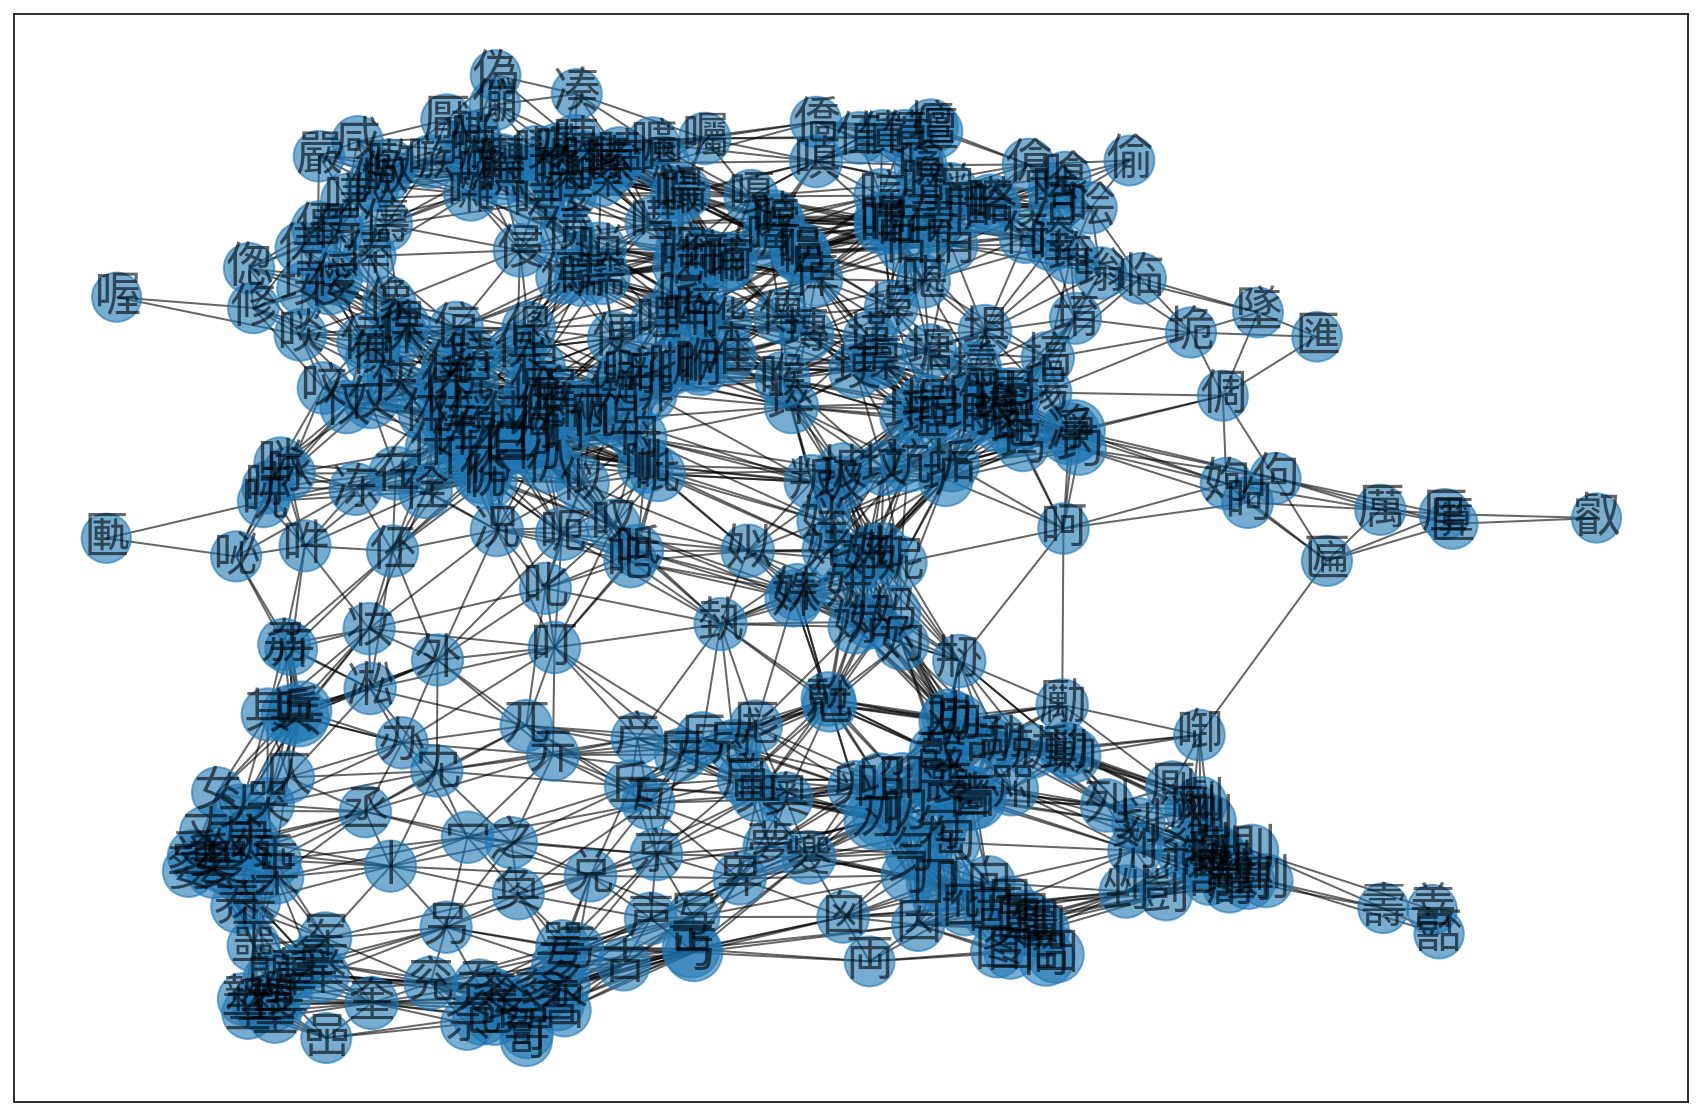

In [270]:
plt.figure(figsize = (15,10))

deg = dict(f.degree(weight = 'weight'))
connection = dict(f.degree)
# print(deg)
nx.draw_networkx(f, pos, with_labels= True,\
                node_color='tab:blue', edgelist=f.edges(),\
                width=1, alpha=0.6,  font_family = font_name,\
                 font_size = 24, node_size=[v * 30 for v in deg.values()])#)
plt.savefig('network.png')

# Plot using Bokeh

In [231]:
# G=nx.karate_club_graph()
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool,\
BoxSelectTool, BoxZoomTool, ResetTool,ColumnDataSource,OpenURL

from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4



In [247]:


plot = figure(title="",x_range=(-1.1, 1.1), y_range=(-1.1, 1.1),
              tools="tap, pan", toolbar_location=None)
graph = from_networkx(f, nx.spring_layout, center=(0,0))

graph.edge_renderer.glyph = MultiLine(line_color="black", line_alpha=0.8, line_width=1)
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=2)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=2)

graph.node_renderer.glyph = Circle(size=10, fill_color=Spectral4[0], fill_alpha = 0.5, line_width=0)
graph.node_renderer.selection_glyph = Circle(size=10, fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size=10, fill_color=Spectral4[1])


graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = NodesAndLinkedEdges()

node_size=[1*v for v in deg.values()]
index = list(f.nodes())
color = [Spectral4[0]]*len(node_size)
print(len(node_size))

400


In [248]:
node_source = ColumnDataSource(data=dict(index=list(f.nodes()),
                                degrees = list(deg.values()),
                                connections = list(connection.values()),
                                         
                                node_size = list(node_size),
                                color = color,
                                  
                                        
                                        ))


In [249]:

graph.node_renderer.glyph.size = {'field': 'node_size'}
graph.node_renderer.glyph.fill_color = {'field': 'color'}
plot.renderers.append(graph)
graph.node_renderer.data_source.data = node_source.data
node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("degree", "@degrees"), ("connections", "@connections")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())




In [250]:

output_file("networkx_graph_500words.html")
show(plot)